### Breast Cancer Classification Using Kaggle Dataset

#### Import/Install dependencies

In [ ]:
%%capture
!pip install scikit-learn tensorflow-macos

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

#### Data Processing

In [ ]:
df = pd.read_csv('data/cancer_data.csv')

In [ ]:
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

In [ ]:
#summary statistics for each column
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [ ]:
#Explore if there are any null values and decide what to do with these values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#get rid of 'Unnamed: 32' column
df = df.loc[:,~df.columns.str.match("Unnamed")]

In [ ]:
#quick count to check how many malignant/benign diagnoses there are
m_diagnosis = df[df['diagnosis'] == 'M']
b_diagnosis = df[df['diagnosis'] == 'B']

print(f'Malignant Diagnoses: {len(m_diagnosis.index)}\nBenign Diagnoses: {len(b_diagnosis.index)}')


Malignant Diagnoses: 212
Benign Diagnoses: 357


In [ ]:
#Now, lets change the diagnosis to 0's and 1's for binary classification using LabelEncoder
y_before = df['diagnosis'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print('Diagnosis Values: ', np.unique(y))  #Malignant = 1, Benign = 0

Diagnosis Values:  [0 1]


In [ ]:
#Normalize features 

#feature dataset
features = df.drop(labels=['diagnosis', 'id'], axis=1)
features.describe().T[:9] #values are too scattered and needs normalization


count        mean         std        min        25%  \
radius_mean          569.0   14.127292    3.524049    6.98100   11.70000   
texture_mean         569.0   19.289649    4.301036    9.71000   16.17000   
perimeter_mean       569.0   91.969033   24.298981   43.79000   75.17000   
area_mean            569.0  654.889104  351.914129  143.50000  420.30000   
smoothness_mean      569.0    0.096360    0.014064    0.05263    0.08637   
compactness_mean     569.0    0.104341    0.052813    0.01938    0.06492   
concavity_mean       569.0    0.088799    0.079720    0.00000    0.02956   
concave points_mean  569.0    0.048919    0.038803    0.00000    0.02031   
symmetry_mean        569.0    0.181162    0.027414    0.10600    0.16190   

                           50%       75%        max  
radius_mean           13.37000   15.7800    28.1100  
texture_mean          18.84000   21.8000    39.2800  
perimeter_mean        86.24000  104.1000   188.5000  
area_mean            551.10000  782.7000  2501.0000  
smoothness_mean        0.09587    0.1053     0.1634  
compactness_mean       0.09263    0.1304     0.3454  
concavity_mean         0.06154    0.1307     0.4268  
concave points_mean    0.03350    0.0740     0.2012  
symmetry_mean          0.17920    0.1957     0.3040

In [ ]:
#Use MinMaxScaler from sklearn to scale the features to a smiliar range (0-1)
minmax = MinMaxScaler()
features = minmax.fit_transform(features)
features

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
#Splitting dataset into train/test set

x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.25, train_size=0.75,random_state=42)  
print(x_train.shape)
print(x_test.shape)


(426, 30)
(143, 30)


#### Model

In [ ]:
#Create model and use log loss function
model = Sequential([Dense(units=16,input_dim=30, activation='relu'),
                   Dropout(0.2),
                   Dense(units=1),
                   Activation('sigmoid'),
                   ],name='Breast_Cancer_Model')
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "Breast_Cancer_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                496       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
 activation_10 (Activation)  (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%capture
#Since it is a small model, the CPU will do just fine training for a few hundred epochs
hist = model.fit(x_train, y_train, verbose=1, epochs=150, batch_size=64, validation_data=(x_test,y_test))

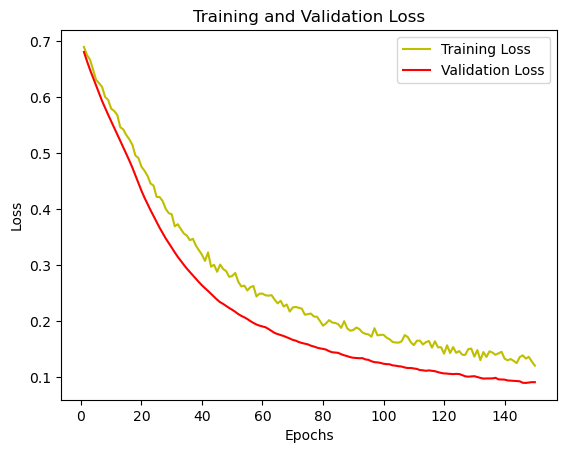

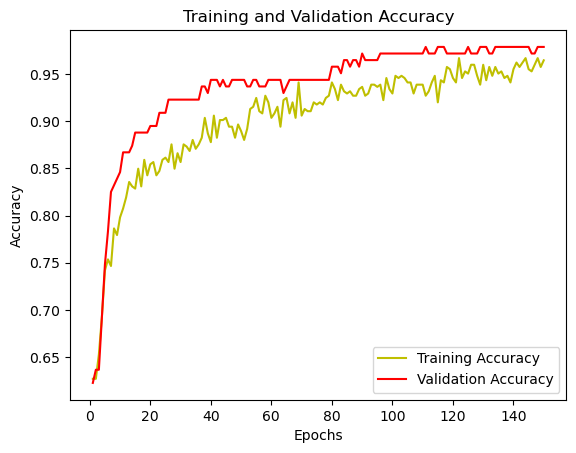

In [ ]:
#Visualization for training and validation accuracy


epochs = range(1,len(loss)+1)

#Training/Validation Loss visualization
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Training/validation accuracy visualization
training_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
plt.plot(epochs, training_accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



#### Predictions

In [ ]:
#use model to predict from training set and set threshold to 0.5
yhat = model.predict(x_test)
yhat = (yhat>0.5)

conf_matrix = confusion_matrix(y_test, yhat)
conf_matrix


5/5 [==============================] - 0s 815us/step


array([[87,  2],
       [ 1, 53]])

<Axes: >

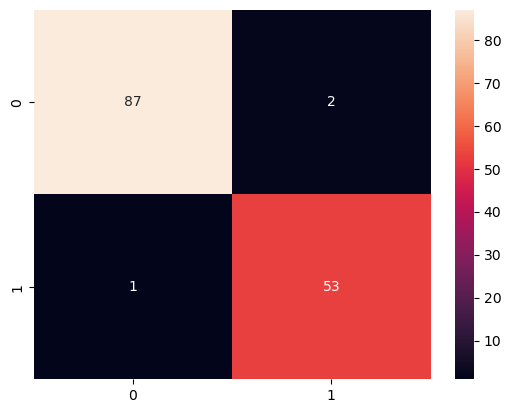

In [ ]:
#Heatmap visualization
sns.heatmap(conf_matrix, annot=True)

#### Our Model vs. Logistic Regression